# tidy_data exercises

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

# 1. Attendance Data

- Load the attendance.csv file and calculate an attendnace percentage for each student.
- One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [9]:
attendance = pd.read_csv('untidy-data/attendance.csv')
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [10]:
# p = present = 1 day
# t = tardy = .9 day
# h = halfday = .5 day 
# a = absent = 0 day

In [13]:
pd.melt(attendance, id_vars= 'Unnamed: 0')


,Unnamed: 0,variable,value
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [16]:
attendance_tidy = pd.melt(attendance, id_vars='Unnamed: 0', var_name='date', value_name='roll_call')
attendance_tidy

,Unnamed: 0,date,roll_call
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [24]:
attendance_tidy.columns = ('name', 'date', 'roll_call')

In [25]:
attendance_tidy.head()

,name,date,roll_call
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [30]:
attendance_tidy.replace({'P':1, 'A':0, 'H':.5, 'T':.9}, inplace=True)

In [32]:
attendance_tidy.groupby('name').mean()

,roll_call
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


# 2. Coffee Levels

- Read the coffee_levels.csv file.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?

In [33]:
coffee_lvl = pd.read_csv('untidy-data/coffee_levels.csv')

In [35]:
coffee_lvl

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [41]:
coffee_lvl.pivot_table(index='hour', columns='coffee_carafe', values='coffee_amount').reset_index()

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


In [46]:
coffee_lvl.pivot_table(index='hour', columns='coffee_carafe', values='coffee_amount').reset_index().T

,0,1,2,3,4,5,6,7,8,9
coffee_carafe,,,,,,,,,,
hour,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000
x,0.816164,0.451018,0.843279,0.335533,0.898291,0.310711,0.507288,0.215043,0.183891,0.391560
y,0.189297,0.521502,0.023163,0.235529,0.017009,0.997464,0.058361,0.144644,0.544676,0.594126
z,0.999264,0.915990,0.144928,0.311495,0.771947,0.398520,0.864464,0.436364,0.280621,0.436677


<AxesSubplot:xlabel='hour', ylabel='coffee_carafe'>

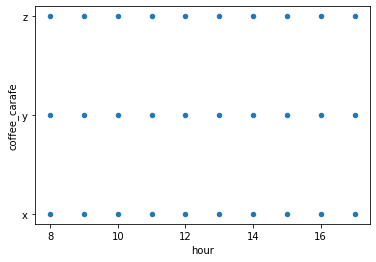

In [53]:
coffee_lvl.plot.scatter(x='hour', y='coffee_carafe')

# 3. Cake Recipes

- Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

- Tidy the data as necessary.

- Which recipe, on average, is the best? recipe b

- Which oven temperature, on average, produces the best results? 275

- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [47]:
cake = pd.read_csv('untidy-data/cake_recipes.csv')

In [48]:
cake

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626
